# Setup inicial e carregamento dos dados

In [5]:
import logging
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS
import numpy as np

from utils.downloads import (
    Censo,
    Nivel,
    download_malha,
    download_dados,
)

In [6]:
logging.basicConfig(level=logging.INFO)
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

## Setores censitários de 2022

In [7]:
%%time
setores22 = download_malha(Censo.CENSO_2022, Nivel.SETORES)
setores22 = setores22[setores22['CD_MUN'] == '3550308']
setores22 = setores22.to_crs(epsg=31983)
setores22.sample(3)

INFO:root:Carregando a malha de setores do censo de 2022.
INFO:root:O arquivo data/cache/setores/2022/SP_Malha_Preliminar_2022.zip já foi baixado anteriormente. Usando cache local.


CPU times: user 1min 7s, sys: 1.1 s, total: 1min 8s
Wall time: 1min 18s


,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,CD_CONCURB,NM_CONCURB,v0001,v0002,v0003,v0004,v0005,v0006,v0007,geometry
82038,355030855000673P,0.318266,3,Sudeste,35,São Paulo,3550308,São Paulo,355030855,Parelheiros,...,3550308,São Paulo/SP,50,29,29,0,2.631579,0.000000,19,"POLYGON ((325494.787 7365491.606, 325497.681 7..."
91813,355030890000734P,0.011889,3,Sudeste,35,São Paulo,3550308,São Paulo,355030890,Vila Mariana,...,3550308,São Paulo/SP,94,57,57,0,2.000000,8.510638,47,"POLYGON ((333905.028 7390108.767, 333872.381 7..."
90064,355030883000420P,0.025048,3,Sudeste,35,São Paulo,3550308,São Paulo,355030883,Vila Andrade,...,3550308,São Paulo/SP,305,195,195,0,1.848485,29.090909,165,"POLYGON ((323411.180 7387280.682, 323377.637 7..."


## Setores censitários de 2010

In [8]:
setores10 = download_malha(Censo.CENSO_2010, Nivel.SETORES)
setores10 = setores10[setores10['CD_GEOCODM'] == '3550308']
setores10 = setores10.to_crs(epsg=31983)
setores10.sample(3)

INFO:root:Carregando a malha de setores do censo de 2010.
INFO:root:O arquivo data/cache/setores/2010/sp_setores_censitarios.zip já foi baixado anteriormente. Usando cache local.


,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
55137,120676.0,355030859000182,URBANO,35503085900,None,355030859,PENHA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,55138,"POLYGON ((345568.794 7397729.726, 345560.184 7..."
56848,122430.0,355030868000127,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56849,"POLYGON ((336864.092 7387215.268, 336863.744 7..."
53991,119485.0,355030852000052,RURAL,35503085200,None,355030852,MARSILAC,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,53992,"POLYGON ((321076.486 7356264.825, 321091.050 7..."


# Seção inicial - incompatibilidade e motivação

In [9]:
# Setor censitário escolhido previamente para centralização
cd_geocodi = '355030868000233'

In [10]:
xmin, ymin, xmax, ymax = setores10.loc[setores10['CD_GEOCODI']==cd_geocodi].total_bounds
setores10.cx[xmin:xmax, ymin:ymax]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
56920,122502.0,355030868000199,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56921,"POLYGON ((336559.556 7387626.957, 336568.429 7..."
56921,122503.0,355030868000200,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56922,"POLYGON ((336780.689 7388067.010, 336789.895 7..."
56948,122530.0,355030868000227,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56949,"POLYGON ((336433.583 7388094.801, 336455.482 7..."
56949,122531.0,355030868000228,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56950,"POLYGON ((336300.170 7388006.143, 336310.304 7..."
56950,122532.0,355030868000229,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56951,"POLYGON ((336204.198 7388027.881, 336205.637 7..."
56951,122533.0,355030868000230,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56952,"POLYGON ((336484.532 7388320.420, 336410.139 7..."
56952,122534.0,355030868000231,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56953,"POLYGON ((336780.390 7388822.889, 336782.376 7..."
56953,122535.0,355030868000232,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56954,"POLYGON ((336709.862 7388558.733, 336742.169 7..."
56954,122536.0,355030868000233,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56955,"POLYGON ((336433.583 7388094.801, 336442.228 7..."
57152,122632.0,355030868000329,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,57153,"POLYGON ((336777.770 7388053.357, 336780.689 7..."


In [20]:
bounding_box = setores10.loc[setores10['CD_GEOCODI']==cd_geocodi].envelope
bbox_df = gpd.GeoDataFrame(gpd.GeoSeries(bounding_box), columns=['geometry'])
bbox_df

,geometry
56954,"POLYGON ((336433.583 7387932.171, 336793.825 7..."


In [24]:
crop_10 = gpd.overlay(setores10, bbox_df, how='intersection', keep_geom_type=True)
crop_10

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,122502.0,355030868000199,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56921,"MULTIPOLYGON (((336518.302 7387957.089, 336627..."
1,122503.0,355030868000200,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56922,"POLYGON ((336789.895 7388109.866, 336793.825 7..."
2,122530.0,355030868000227,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56949,"POLYGON ((336455.482 7388089.509, 336479.932 7..."
3,122531.0,355030868000228,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56950,"POLYGON ((336439.012 7388211.373, 336439.032 7..."
4,122532.0,355030868000229,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56951,"POLYGON ((336471.596 7388263.570, 336468.607 7..."
5,122534.0,355030868000231,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56953,"POLYGON ((336593.901 7388296.393, 336503.356 7..."
6,122535.0,355030868000232,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56954,"POLYGON ((336788.403 7388133.771, 336784.205 7..."
7,122536.0,355030868000233,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,56955,"POLYGON ((336442.228 7388133.882, 336451.661 7..."
8,122632.0,355030868000329,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,57153,"POLYGON ((336780.689 7388067.010, 336787.124 7..."
9,122638.0,355030868000335,URBANO,35503086800,None,355030868,SACOMÃ,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,57159,"POLYGON ((336703.023 7388294.292, 336708.963 7..."


<Axes: >

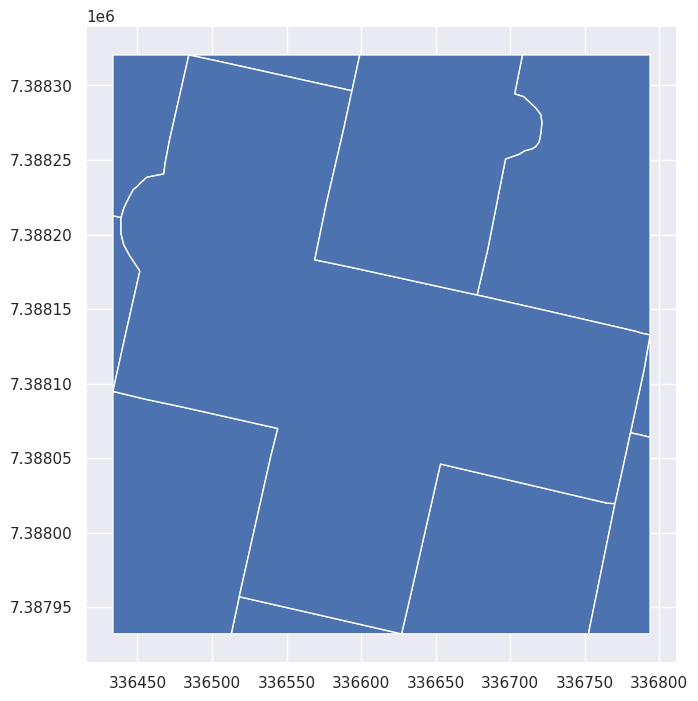

In [25]:
crop_10.plot()

In [26]:
crop_22 = gpd.overlay(setores22, bbox_df, how='intersection', keep_geom_type=True)
crop_22

,CD_SETOR,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,...,CD_CONCURB,NM_CONCURB,v0001,v0002,v0003,v0004,v0005,v0006,v0007,geometry
0,355030868000199P,0.074068,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,449,245,245,0,2.427027,2.702703,185,"POLYGON ((336518.302 7387957.089, 336627.167 7..."
1,355030868000200P,0.039966,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,409,189,189,0,2.556250,21.875000,160,"POLYGON ((336787.124 7388065.645, 336780.689 7..."
2,355030868000229P,0.039584,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,533,255,255,0,2.550239,9.569378,209,"POLYGON ((336471.596 7388263.570, 336468.607 7..."
3,355030868000329P,0.042970,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,280,156,156,0,2.616822,16.822430,107,"POLYGON ((336770.291 7388019.495, 336777.770 7..."
4,355030868000335P,0.026402,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,285,150,150,0,2.244094,14.960630,127,"POLYGON ((336703.023 7388294.292, 336708.963 7..."
5,355030868000598P,0.034841,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,254,132,132,0,2.442308,12.500000,104,"POLYGON ((336455.482 7388089.509, 336479.932 7..."
6,355030868000600P,0.025214,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,321,168,168,0,2.431818,6.060606,132,"POLYGON ((336439.012 7388211.373, 336439.032 7..."
7,355030868000603P,0.026418,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,251,153,153,0,1.945736,0.000000,129,"POLYGON ((336593.901 7388296.393, 336503.356 7..."
8,355030868000604P,0.040228,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,446,297,297,0,2.218905,16.417910,201,"POLYGON ((336793.825 7388132.614, 336788.403 7..."
9,355030868000605P,0.011458,3,Sudeste,35,São Paulo,3550308,São Paulo,355030868,Sacomã,...,3550308,São Paulo/SP,316,193,193,0,2.038710,5.161290,155,"POLYGON ((336734.539 7388197.849, 336677.793 7..."


<Axes: >

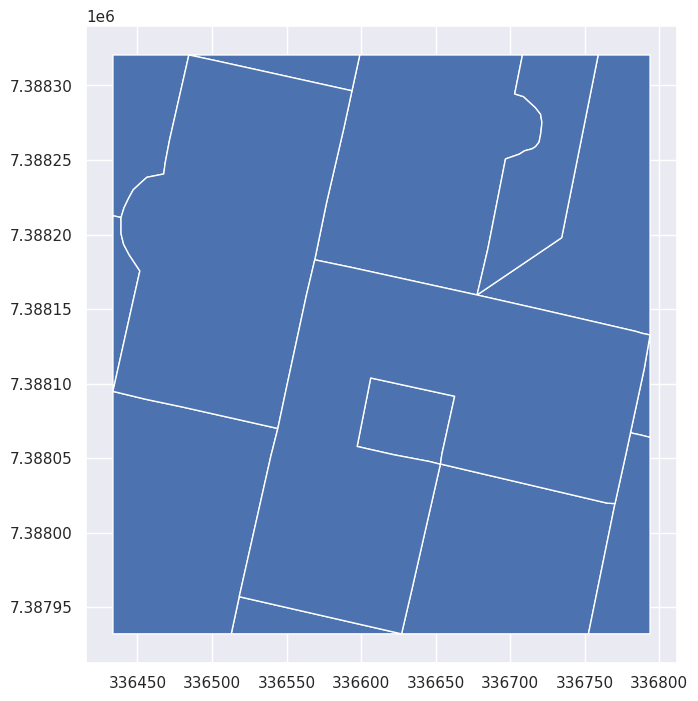

In [27]:
crop_22.plot()

<Axes: >

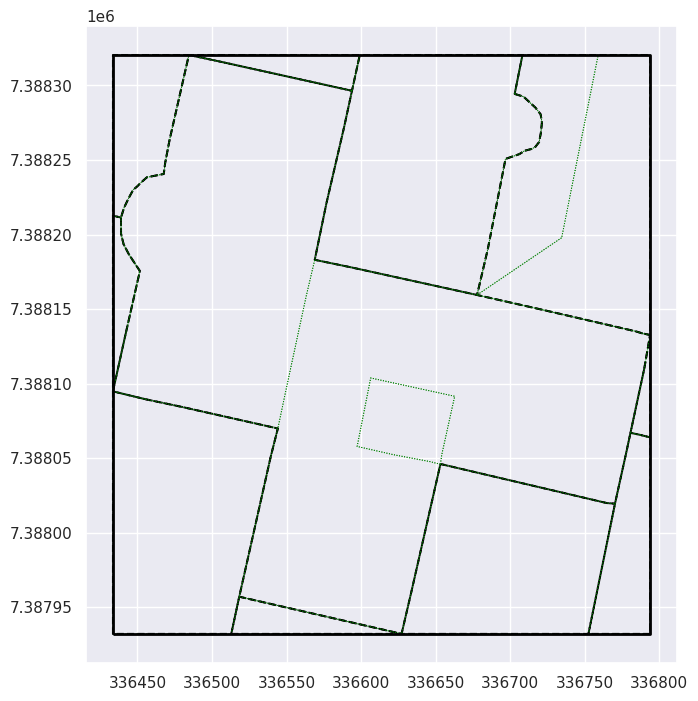

In [35]:
base = crop_10.plot(
    facecolor='none',
    edgecolor='black',
    linestyle='dashed',
    linewidth=1.4
)

crop_22.plot(
    ax=base,
    facecolor='none',
    edgecolor='green',
    linewidth=0.7,
    linestyle='dotted'
)

bbox_df.plot(
    ax=base,
    facecolor='none',
    edgecolor='black',
    linewidth=2
)